# Advertising----Total Sales Prediction 

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

#### Dataset Loading:

In [309]:

pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### Checking the Dimensions of Dataset

In [221]:
df.shape

(200, 5)

Dataset Description:                                                                                                        
Number of columns:5                                                                                                         
Number of rows: 200                                                                                                         
Number of Independent Columns: 4                                                                                           
Number of Dependent Column: 1                                    

#### summary of a Dataset

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Dataset has two data types: float64, int64 

#### check for missing or null values per column

In [312]:
df.isnull().sum(axis=0)

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Columns has no missing value.

#### Getting Each Attribute’s Data Type

In [313]:
print(df.dtypes)

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object


#### TO check for Continuous and Categorical column

In [227]:
df.nunique()   

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

#Target Variable(Continuous)     : sales                                                                                    
#Predictors Variables            : All are Countinuous 

#### Statistics Description of Data

In [315]:
df.describe(exclude=[object])

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#### Visualization of Statistical description of Data

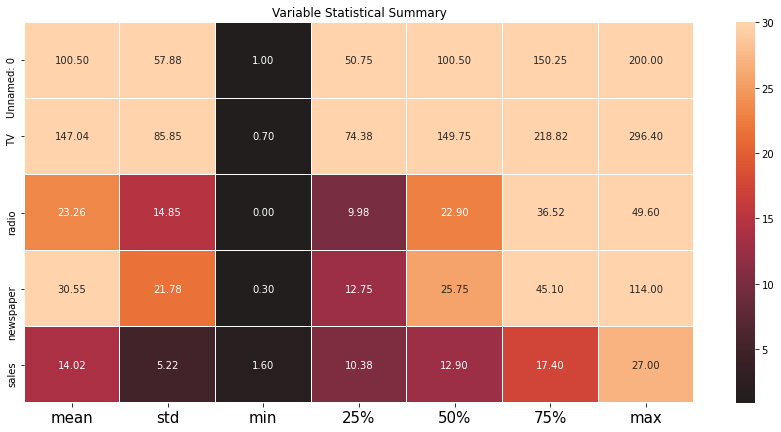

In [316]:
plt.figure(figsize=(15,7)) 
sns.heatmap(round(df.describe()[1:].transpose(),2),vmin=.9, vmax=30, center=0,annot=True,fmt='.2f', linewidths=.1, )
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title("Variable Statistical Summary")
plt.show()

#### Categorical features in Dataset

In [317]:
catfeat = [cname for cname in df.columns if df[cname].dtype == 'O']
print("Number of Categorical Features: {}".format(len(catfeat)))
print("Categorical Features: ",catfeat)

Number of Categorical Features: 0
Categorical Features:  []


#### Countinuous Features in Dataset

In [318]:
numfeat = [cname for cname in df.columns if df[cname].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numfeat)))
print("Numerical Features: ",numfeat)

Number of Numerical Features: 5
Numerical Features:  ['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']


#### cardinality check for Countinuous features

In [319]:
for i in numfeat:
    uval = len(df[i].unique())
    print("Cardinality of {} are     : {}".format(i, uval))

Cardinality of Unnamed: 0 are     : 200
Cardinality of TV are     : 190
Cardinality of radio are     : 167
Cardinality of newspaper are     : 172
Cardinality of sales are     : 121


#### Visualization of Cardinality of All Features and Target in Dataset

Text(0.5, 1.0, 'Cardinality')

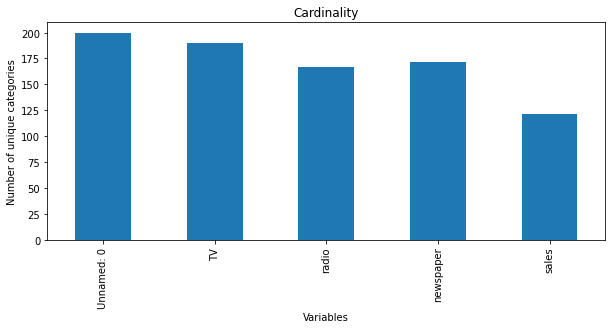

In [320]:
df.nunique().plot.bar(figsize=(10,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

#high cardinality Countinuous features: All

#### decrease high cardinality

#Total number of columns

In [323]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

#dropping unwanted column

In [324]:
df=df.drop(["Unnamed: 0"],axis=1)
print(df.shape)

(200, 4)


#round up value of columns

In [325]:
df["TV"]=df["TV"].round(0)
df["radio"]=df["radio"].round(0)
df["newspaper"]=df["newspaper"].round(0)
df["sales"]=df["sales"].round(0)

#reduced cardinality check

Text(0.5, 1.0, 'Cardinality')

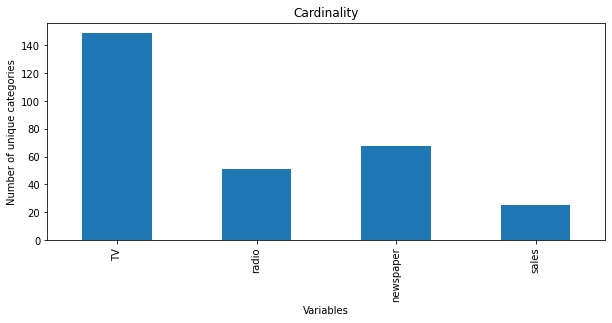

In [326]:
df.nunique().plot.bar(figsize=(10,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

##### Handling zero values in radio column

In [327]:
df['radio'] = df['radio'].replace([0],df['radio'].mean())
(df['radio']==0).value_counts()

False    200
Name: radio, dtype: int64

#### check for duplicate rows

In [328]:
sum(df.duplicated())

0

#there is no duplicated rows

#### check for Outliers for Continuous features

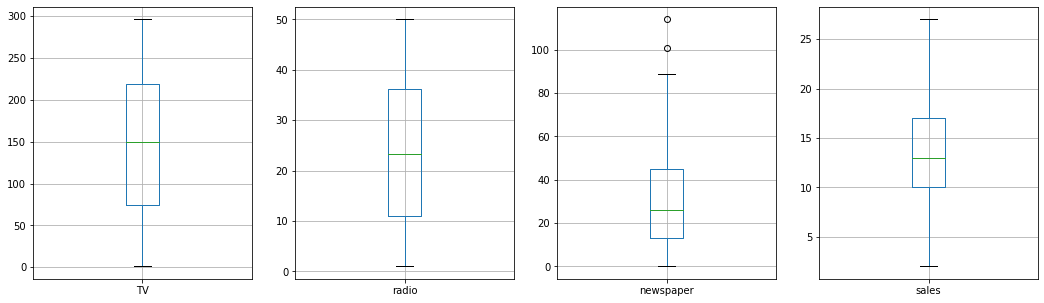

In [329]:
colslst1=['TV', 'radio', 'newspaper', 'sales']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

#there is few outliers in Newspaper column

#### Removing outliers

#Removing Outlier from newspaper feature

In [331]:
fout = ['newspaper']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

#After removing check for outlier

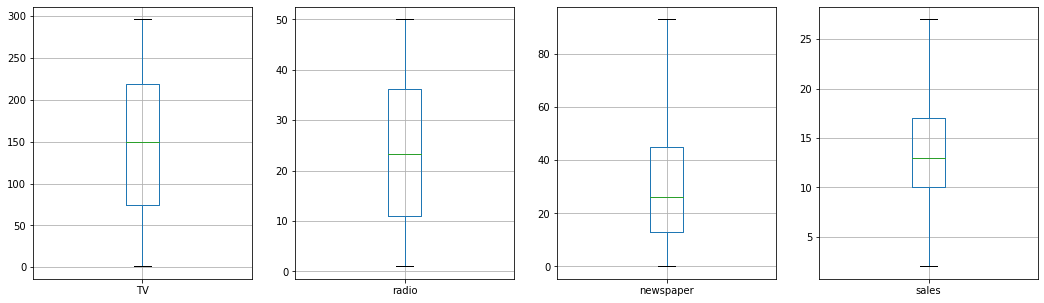

In [332]:
colslst1=['TV', 'radio', 'newspaper', 'sales']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

#outliers in newspaper column is removed

#### Check for Skweness in Dataset variables

In [333]:
df.skew()

TV          -0.068858
radio        0.086227
newspaper    0.739696
sales        0.408755
dtype: float64

#there is skewness in newspaper column

#### a) Exploring target variable: Sales            #Univariate Analysis

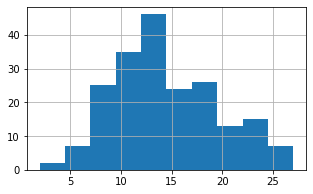

In [335]:
df['sales'].hist(figsize=(5,3))
plt.show()

#Target variable is balanced.

#### b) Creating Graph for--------- Continuous(Predictor) variable          # Univariate Plot

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>, <AxesSubplot:>]],
      dtype=object)

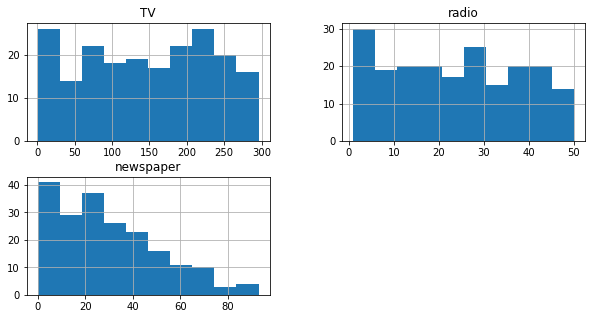

In [336]:
df[['TV', 'radio', 'newspaper']].hist(figsize=(10,5))


#Shows Right skewed distribution in newspaper

#### removing Skweness from columns newspaper

<AxesSubplot:>

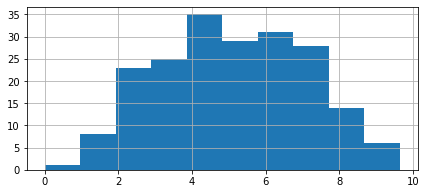

In [337]:
df['newspaper']= np.sqrt(df['newspaper'])
df['newspaper'].hist(figsize=(7,3))

#### a)TV vs sales        #Bivariate Analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

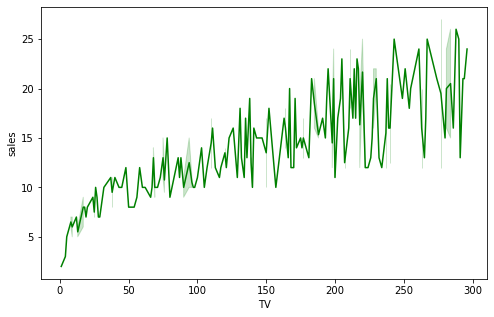

In [355]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x='TV',y='sales',color='green')
#sns.lineplot('TV',data=df,palette='ocean')

#Tv sale is in increasing (upward direction)

#### b)radio vs sales       

<AxesSubplot:xlabel='radio', ylabel='sales'>

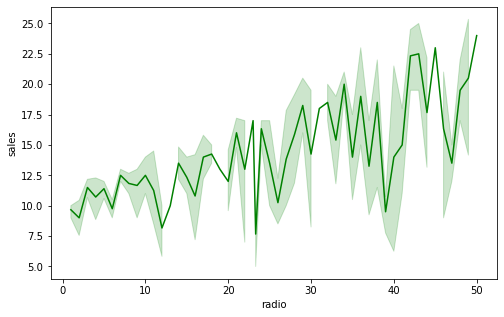

In [356]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x='radio',y='sales',color='green')
#sns.lineplot('TV',data=df,palette='ocean')

#radio sales is increasing (upwards diresction)

#### c)Newspaper vs sales

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

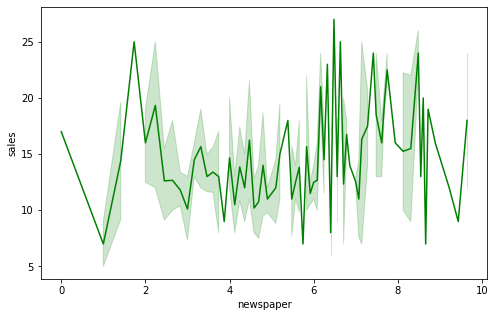

In [351]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x='newspaper',y='sales',color='green')
#sns.lineplot('TV',data=df,palette='ocean')

#newspaper sale have dip in the middle and than its have horizontal growth

#### d) Newspaper vs TV

<AxesSubplot:xlabel='newspaper', ylabel='TV'>

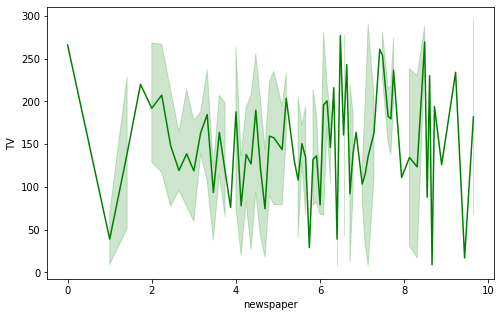

In [357]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x='newspaper',y='TV',color='green')
#sns.lineplot('TV',data=df,palette='ocean')

#have approx slight dip and horizontal growth in sales

#### e) Newspaper Vs Radio

<AxesSubplot:xlabel='newspaper', ylabel='radio'>

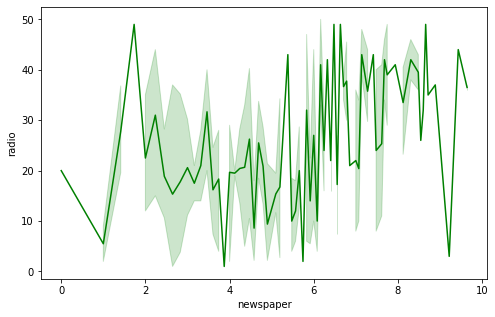

In [358]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x='newspaper',y='radio',color='green')
#sns.lineplot('TV',data=df,palette='ocean')

#have big dip in sales

#### f) TV vs RAdio

<AxesSubplot:xlabel='TV', ylabel='radio'>

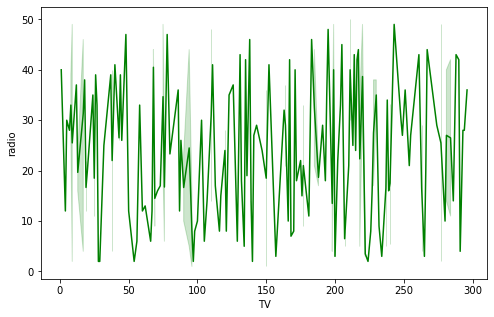

In [354]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x='TV',y='radio',color='green')
#sns.lineplot('TV',data=df,palette='ocean')

#shows horizontal growth in sales

   #### a) TV vs radio vs Newspaper vs sales                                                       #Multivariate Analysis

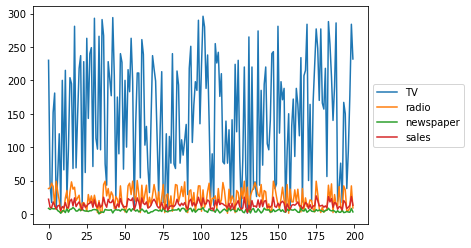

In [371]:
ax = df[["TV","radio","newspaper","sales"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, .5));

#TV sales is higher than other

#### b)TV vs radio vs newspaper

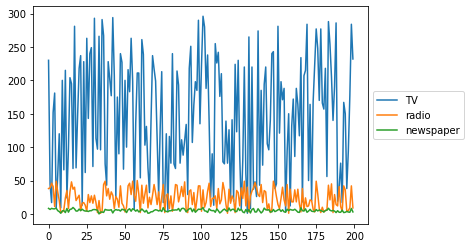

In [372]:
ax = df[["TV","radio","newspaper"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, .5));

#### Anova Test 

In [338]:
import scipy.stats as stat
from scipy.stats import f_oneway
cp=df.iloc[:,[0,1,2]]
sp=[]
for i in cp:
    cg=df.groupby('sales')[i].apply(list)
    av=stat.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        sp.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')

TV ------correlated------: 1.008582902144691e-34 

radio ------correlated------: 1.0970239876015262e-13 

newspaper ------correlated------: 0.06972128304236488 



#### Check for Correlation

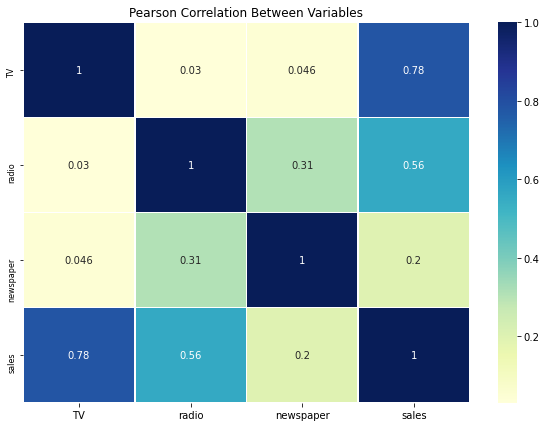

In [339]:
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(10,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

#shows TV and then radio have high sale

#### Check Strongly Related Features

In [340]:
cor = df.corr()
cor_target = abs(cor["sales"])
strong_related = cor_target[cor_target>0.2]
print("Strongly Related:\n\n",strong_related,"\n")

weak_related = cor_target[cor_target<0.2]
print("Weak Relates:\n\n",weak_related)

Strongly Related:

 TV       0.781087
radio    0.556786
sales    1.000000
Name: sales, dtype: float64 

Weak Relates:

 newspaper    0.198005
Name: sales, dtype: float64


#### Splitting data into Independent Features and Dependent Features

In [341]:
x = df.iloc[:,:2]
y = df.iloc[:,-1]

# determining the shape of x and y.
print(x.shape)
print(y.shape)


(200, 2)
(200,)


#### Splitting data into Independent Features and Dependent Features

In [342]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 440)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(130, 2)
(130,)
(70, 2)
(70,)


#### Normalization of Data

In [343]:
from sklearn.preprocessing import power_transform
x_train=power_transform(x_train,method='yeo-johnson')
print('x_train:\n',x_train)
x_test=power_transform(x_test,method='yeo-johnson')
print('\nx_test:\n',x_test)

x_train:
 [[ 1.1021795   0.29809381]
 [-0.57998486 -1.85952314]
 [-0.17764942  1.16033649]
 [ 0.66745488  1.49811655]
 [ 1.21790605  1.20979212]
 [ 1.39893631 -0.55924665]
 [-0.26738838  0.74778988]
 [ 1.03414525  0.47188041]
 [ 1.38000234 -0.79410549]
 [-1.79860109 -1.70951445]
 [ 0.73780205  0.69384933]
 [ 0.89684824 -1.57792801]
 [ 0.71775191  1.11044716]
 [ 0.49452324  0.74778988]
 [-1.65496128  1.30745469]
 [-1.3440616   0.95803255]
 [-0.29001163 -1.05295556]
 [-0.40433623  1.06011008]
 [ 1.46498769  0.35678334]
 [ 1.20830456 -0.13808883]
 [ 0.40169193 -0.07268675]
 [ 0.59661586  0.6393134 ]
 [-0.13321292  1.11044716]
 [ 0.82755609 -0.41267692]
 [ 1.34204999 -0.87728791]
 [ 1.17945441 -1.45853752]
 [ 1.06335155  0.80115781]
 [-1.81801942  0.29809381]
 [-0.95017156 -1.24444194]
 [-0.82350005 -0.79410549]
 [-0.57998486 -0.48508139]
 [-0.08905133 -0.55924665]
 [ 0.77778696 -1.45853752]
 [-0.16651398 -0.27260127]
 [-0.33549486 -0.48508139]
 [-0.30135255 -0.13808883]
 [-1.30093503  1.0

#### Sandardization of data

In [344]:
sc=MinMaxScaler()
x_train = sc.fit_transform(x_train)
print('x_train:\n',x_train)
x_test = sc.fit_transform(x_test)
print('\nx_test:\n',x_test)

x_train:
 [[0.88973132 0.64259931]
 [0.39139271 0.        ]
 [0.51058397 0.89939955]
 [0.76094482 1.        ]
 [0.92401514 0.91412883]
 [0.97764508 0.38725909]
 [0.48399894 0.77653151]
 [0.86957628 0.69435787]
 [0.97203592 0.31731149]
 [0.03037952 0.04467683]
 [0.78178506 0.76046649]
 [0.82890225 0.08386699]
 [0.77584524 0.8845411 ]
 [0.70971409 0.77653151]
 [0.07293259 0.94321551]
 [0.16503615 0.83914772]
 [0.47729684 0.24021862]
 [0.44342835 0.86954929]
 [0.9972127  0.66007871]
 [0.92117071 0.51269179]
 [0.68221296 0.53217038]
 [0.73995887 0.74422415]
 [0.52374821 0.8845411 ]
 [0.80837456 0.4309117 ]
 [0.96079259 0.29253741]
 [0.9126239  0.11942485]
 [0.8782286  0.79242599]
 [0.02462687 0.64259931]
 [0.28172547 0.18318857]
 [0.31925171 0.31731149]
 [0.39139271 0.4093476 ]
 [0.53683102 0.38725909]
 [0.79363053 0.11942485]
 [0.51388283 0.47263018]
 [0.4638225  0.4093476 ]
 [0.47393711 0.51269179]
 [0.17781233 0.86954929]
 [0.84057432 0.76046649]
 [0.95233794 0.04467683]
 [0.84639488 0.

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, accuracy_score
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

#### Model Building 

#### Model Building using Linear Regression

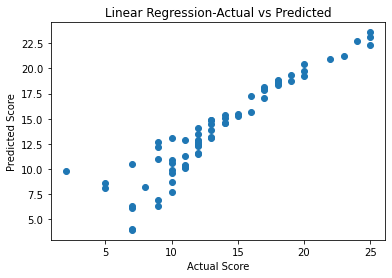


r2 Score On Train Data: 0.9165207700949441

r2 Score On Test Data: 0.87352172624377


Mean Absolute Error: 1.2948819242941647

Mean Squared Error: 3.2326814296388253

Root Mean Squared Error: 1.797965914481925

Explained Variance Score: 0.8791394002606072

Cross Validation
Linear Regression Score: [0.86517375 0.91812177 0.92903187 0.83395292 0.89086213]
Average LinearRegression score: 0.8874


In [257]:
regressor = LinearRegression(normalize=True)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,x, y, cv=5)
print('\nCross Validation')
print('Linear Regression Score:',scores)
print('Average LinearRegression score:',round(scores.mean(),4))

In [258]:
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
positive=[True,False]
n_jobs= [1,5,10, 100,200,500]
param_distributions = dict(fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           positive=positive,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score:  0.8930910768529102
Best Params:  {'positive': True, 'normalize': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}


#### Model building using Lasso

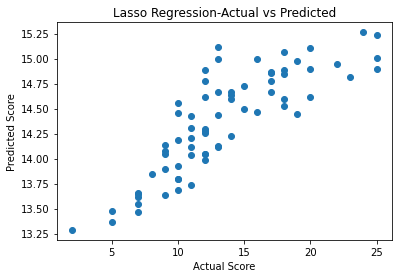


r2 Score On Train Data: 0.15806503455893484

r2 Score On Test Data: 0.12385154817620814


Mean Absolute Error: 3.9666791433112896

Mean Squared Error: 22.393639205390137

Root Mean Squared Error: 4.73219179718977

Explained Variance Score: 0.15825943857433533

Cross Validation
Lasso Regression Score: [0.98964203 0.99436041 0.9952639  0.9834179  0.99107116]
Average Lasso Regression score: 0.9908


In [259]:
regressor = Lasso()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])


# Plot outputs

plt.scatter(y_test,y_pred)
#plt.plot(y_test, y_pred, color='blue')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Lasso Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))


scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Lasso Regression Score:',scores)
print('Average Lasso Regression score:',round(scores.mean(),4))

In [260]:
alpha=[0.0001, 0.001, 0.01, 0.1, 1.009, 10.006, 2.00, 5000.09]
fit_intercept=[True,False]
normalize=[True,False]
precompute=[True,False]
copy_X=[True,False]
max_iter=[10, 50,5,90, 200, 110, 500, 1000]
positive=[True,False]
random_state=[1,5,10, 100,200,500]
selection=['cyclic','random']

param_distributions = dict(alpha=alpha,
                           fit_intercept=fit_intercept,
                           normalize=normalize,
                           precompute=precompute,
                           copy_X=copy_X,
                           max_iter=max_iter,
                           positive=positive,
                           random_state=random_state,
                           selection=selection)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.8936359392286155
Best Params:  {'selection': 'random', 'random_state': 500, 'precompute': False, 'positive': True, 'normalize': True, 'max_iter': 1000, 'fit_intercept': True, 'copy_X': True, 'alpha': 0.01}


#### MOdel building using LassoCV

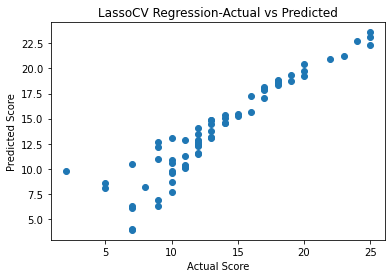


r2 Score On Train Data: 0.9165195858832162

r2 Score On Test Data: 0.8735245342102635


Mean Absolute Error: 1.2944224536207716

Mean Squared Error: 3.2326096603074674

Root Mean Squared Error: 1.7979459558917412

Explained Variance Score: 0.8791634476870267

Cross Validation
LassoCV Regression Score: [0.99875993 0.99934797 0.99937874 0.99813601 0.99886415]
Average LassoCV Regression score: 0.9989


In [263]:
regressor = LassoCV()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue')
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('LassoCV Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('LassoCV Regression Score:',scores)
print('Average LassoCV Regression score:',round(scores.mean(),4))


In [268]:
#alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10]
max_iter = [2,5,10]
eps=[.0001,.01]
cv=[2,5,7]
positive=[True,False]
n_jobs=[1,3,5,9,10]

param_distributions = dict(eps=eps,
                           max_iter=max_iter,
                           cv=cv,
                           n_jobs=n_jobs,
                           positive=positive)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            n_jobs=-1,verbose=1,
                            n_iter=100)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score:  0.8935234949715495
Best Params:  {'positive': False, 'n_jobs': 9, 'max_iter': 10, 'eps': 0.01, 'cv': 5}


#### MOdel BUilding using Ridge

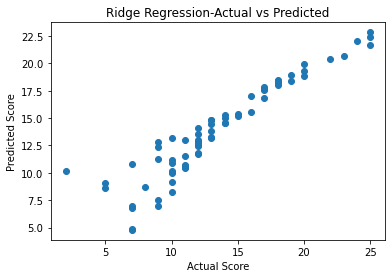


r2 Score On Train Data: 0.910278447204595

r2 Score On Test Data: 0.8651738885206075


Mean Absolute Error: 1.2782279201732953

Mean Squared Error: 3.446045347281453

Root Mean Squared Error: 1.8563527001304072

Explained Variance Score: 0.8723377451174336

Cross Validation
Ridge Regression Score: [0.99999926 0.99999963 0.99999972 0.99999881 0.99999947]
Average Ridge Regression score: 1.0


In [360]:
# Ridge
regressor = Ridge()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Ridge Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Ridge Regression Score:',scores)
print('Average Ridge Regression score:',round(scores.mean(),4))


In [361]:
alpha=[1.2,2.3]
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
max_iter=[10, 50,5,90, 200, 110, 500, 1000]
solver=['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
random_state=[1,5,10, 100,200,500]

param_distributions = dict(alpha=alpha,
                           fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           max_iter=max_iter,
                           solver=solver,
                           random_state=random_state)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.8883458457626124
Best Params:  {'solver': 'saga', 'random_state': 5, 'normalize': True, 'max_iter': 5, 'fit_intercept': False, 'copy_X': True, 'alpha': 1.2}


#### Model Building using Random Forest

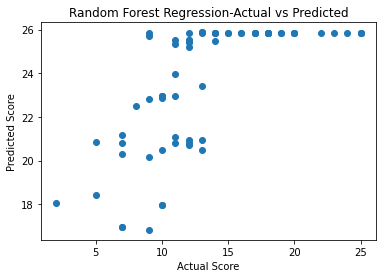


r2 Score On Train Data: 0.9932261381564491

r2 Score On Test Data: -3.641720820539259


Mean Absolute Error: 10.225381652066424

Mean Squared Error: 118.63859501312994

Root Mean Squared Error: 10.892134548064027

Explained Variance Score: 0.4491152275207978

Cross Validation
Random Forest Regression Score: [0.99992849 0.99883391 0.99954002 0.98771889 0.99285658]
Average Random Forest Regression score: 0.9958


In [283]:
regressor = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='mse')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Random Forest Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Random Forest Regression Score:',scores)
print('Average Random Forest Regression score:',round(scores.mean(),4))


In [277]:
n_estimators=[10, 50,5,90, 200, 110, 500]
criterion = ['mse','mae']
max_depth = [2,4,6,8,10]
min_samples_split=[1,5,3,1.5,3.9,10]
min_samples_leaf=[1.4,3,2.6,9.3,1.5]
min_weight_fraction_leaf=[1.4,3.5,1.2,0.5]
max_features=['auto','sqrt','log2']
max_leaf_nodes=[4,6,12,10,25,50]
verbose = [1,5,4,10,15]
random_state= [1,5,10, 100,200,500]
n_jobs= [1,5,10, 100,200]

param_distributions = dict(n_estimators=n_estimators,
                           criterion = criterion,
                           max_depth = max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           max_leaf_nodes=max_leaf_nodes,
                           verbose = verbose,
                           random_state= random_state,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=100)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
bui

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


#### MOdel BUilding using Decision Tree

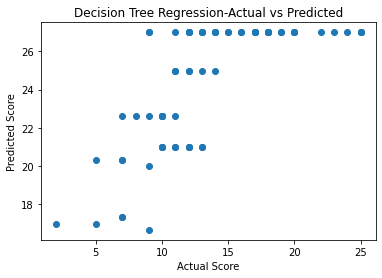


r2 Score On Train Data: 0.9937108697291996

r2 Score On Test Data: -4.177943149153625


Mean Absolute Error: 10.944761904761904

Mean Squared Error: 132.344

Root Mean Squared Error: 11.504086230553037

Explained Variance Score: 0.5087406934241812

Cross Validation
Decision Tree Regression Score: [1.         0.99317857 1.         0.98798386 0.99436937]
Average Decision Tree Regression score: 0.9951


In [284]:
regressor =  DecisionTreeRegressor(max_depth=6,criterion='mse')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Decision Tree Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Decision Tree Regression Score:',scores)
print('Average Decision Tree Regression score:',round(scores.mean(),4))


In [285]:
criterion = ['mse','friedman_mse','mae','poisson']
splitter=['best','random']
max_depth = [2,4,6,8,10,12]
min_samples_split=[1,5,3,1.5,3.9,10,15]
min_samples_leaf=[1,0.5]
min_weight_fraction_leaf=[0.45,0.46,0.0001,0.03,0.005,0.5]
max_features=['auto','sqrt','log2']
ccp_alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_leaf_nodes=[4,6,12,10,25,50]



param_distributions = dict(criterion = criterion,
                           splitter=splitter,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           ccp_alpha=ccp_alpha,
                           max_leaf_nodes=max_leaf_nodes)                      

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.9396081211693901
Best Params:  {'splitter': 'best', 'min_weight_fraction_leaf': 0.0001, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 50, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'mae', 'ccp_alpha': 0.01}


#### MOdel BUildig using Adaboost 

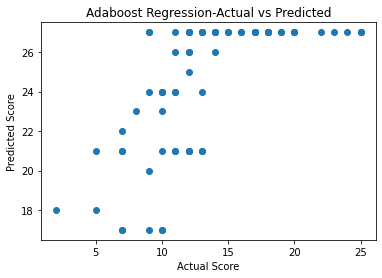


r2 Score On Train Data: 0.9998585652862638

r2 Score On Test Data: -4.262296390929416


Mean Absolute Error: 10.985714285714286

Mean Squared Error: 134.5

Root Mean Squared Error: 11.597413504743201

Explained Variance Score: 0.45952571063557957

Cross Validation
Adaboost Regression Score: [1.         1.         1.         0.98798386 0.99436937]
Average Adaboost Regression score: 0.9965


In [286]:
DTR=DecisionTreeRegressor(max_depth=10)
regressor =  AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Adaboost Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))


scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Adaboost Regression Score:',scores)
print('Average Adaboost Regression score:',round(scores.mean(),4))

In [287]:
n_estimators=[2,4,6,8,10,12]
learning_rate=[1.5,3.4,5.6,9.2,10.2]
random_state=[1,5,10, 100,200,500]
loss=['linear','square','exponential']

param_distributions = dict(n_estimators=n_estimators,
                           learning_rate=learning_rate,
                           random_state=random_state,
                           loss=loss)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Score:  0.9595719390299884
Best Params:  {'random_state': 1, 'n_estimators': 12, 'loss': 'exponential', 'learning_rate': 1.5}


#### MOdel building using GradientBoosting

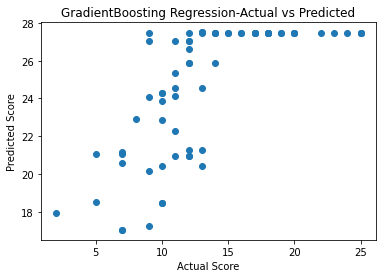


r2 Score On Train Data: 0.998294561990802

r2 Score On Test Data: -4.484735474249988


Mean Absolute Error: 11.280515567249731

Mean Squared Error: 140.18536138674867

Root Mean Squared Error: 11.839989923422598

Explained Variance Score: 0.49390676599691086

Cross Validation
Gradient Boosting Regression Score: [0.99988524 0.99967738 1.         0.98883549 0.99436535]
Average Gradient Boosting Regression score: 0.9966


In [288]:
regressor = GradientBoostingRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('GradientBoosting Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Gradient Boosting Regression Score:',scores)
print('Average Gradient Boosting Regression score:',round(scores.mean(),4))


In [289]:
loss=['ls','lad','huber','quantile']
learning_rate=[.001,.04,.05,0.6,1,1.2,0.5]
n_estimators=[23,45,60,69,98]
subsample=[0,1]
criterion=['friedman_mse','mse','mae']
min_samples_split=[3,5,1.5,0.4]
min_samples_leaf=[1,5,3,1.5,3.9,10,15]
min_weight_fraction_leaf=[1.4,3.5,2.6,9.3,1.2,0.5]
random_state=[1,5,10, 100,200,500]
max_features=['auto','sqrt','log2']
verbose = [1,5,4,10,30,15,20,100]

param_distributions = dict(loss=loss,
                           learning_rate=learning_rate,
                           n_estimators=n_estimators,
                           subsample=subsample,
                           criterion=criterion,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           random_state=random_state,
                           max_features=max_features,
                           verbose = verbose)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)



Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
      Iter       Train Loss   Remaining Time 
         1          20.0279            0.00s
         2          20.0279            0.00s
         3           8.7828            0.00s
         4           8.7589            0.00s
         5           8.7589            0.18s
         6           8.7589            0.15s
         7           8.7588            0.13s
         8           8.7588            0.12s
         9           8.7588            0.11s
        10           8.7588            0.10s
        11           8.7588            0.10s
        12           8.7588            0.09s
        13           8.7588            0.09s
        14           8.7588            0.08s
        15           8.7588            0.08s
        16           8.7588            0.07s
        17           8.7588            0.07s
        18           8.7588            0.07s
        19           8.7588            0.06s
        20           8.7588       

#### MOdel building using XGB (Extreme Gradient Boosting)

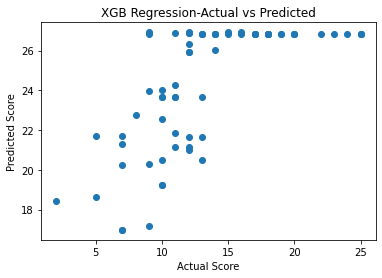


r2 Score On Train Data: 0.9998580326574694

r2 Score On Test Data: -4.243512110675203


Mean Absolute Error: 10.977499961853027

Mean Squared Error: 134.01988913080865

Root Mean Squared Error: 11.576695950520971

Explained Variance Score: 0.4712513556388168

Cross Validation
XGB Regression Score: [0.99995721 0.99652578 0.99997699 0.98878865 0.99435175]
Average XGB Regression score: 0.9959


In [290]:
regressor = XGBRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('XGB Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('XGB Regression Score:',scores)
print('Average XGB Regression score:',round(scores.mean(),4))

In [291]:
colsample_bytree=[0.1, 1.1, 0.1]
n_estimators=[100, 200]
max_depth=[10, 15, 20, 25]
eta=[0.0001, 0.001, 0.01, 0.1, 1.0]
subsample=[0.1, 1.1, 0.1]

param_distributions = dict(colsample_bytree=colsample_bytree,
                           n_estimators=n_estimators,
                           max_depth=max_depth,
                           eta=eta,
                           subsample=subsample)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Score:  0.8128598445237614
Best Params:  {'subsample': 0.1, 'n_estimators': 100, 'max_depth': 10, 'eta': 0.0001, 'colsample_bytree': 0.1}


#### MOdel BUilding using K-Nearest Neighbor(KNN)

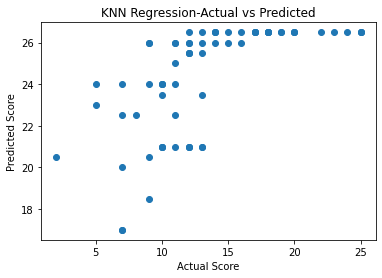


r2 Score On Train Data: 0.99193822131704

r2 Score On Test Data: -4.34487783455765


Mean Absolute Error: 11.007142857142858

Mean Squared Error: 136.6107142857143

Root Mean Squared Error: 11.688058619193963

Explained Variance Score: 0.395382864899393

Cross Validation
KNN Regression Score: [0.95501495 0.96759822 0.95193901 0.94206506 0.96152402]
Average KNN Regression score: 0.9556


In [292]:
regressor =  KNeighborsRegressor(n_neighbors=2)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('KNN Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('KNN Regression Score:',scores)
print('Average KNN Regression score:',round(scores.mean(),4))


In [293]:
n_neighbors= [1,5,4,10,30,15,20,100]
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']
leaf_size=[1,2,4,6,12,10,25,50]
p=[1,2,5,7,10,20,24]
n_jobs= [1,5,10, 100,200,500]

param_distributions = dict(n_neighbors=n_neighbors,
                           weights=weights,
                           algorithm=algorithm,
                           leaf_size=leaf_size,
                           p=p,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.9700906237767967
Best Params:  {'weights': 'distance', 'p': 7, 'n_neighbors': 4, 'n_jobs': 200, 'leaf_size': 10, 'algorithm': 'auto'}


### Choosen K-Nearest Neighbor(KNN) as the final model 

##### Taking full dataset and Separate Target Variable and Predictor Variables

In [304]:
x = df.iloc[:,:3]
y = df.iloc[:,-1]
X=x.values
Y=y.values

PScaler=MinMaxScaler()
PScalerFit=PScaler.fit(X)

X=PScalerFit.transform(X)

print(X.shape)
print(y.shape)


(200, 3)
(200,)


##### Retraining the Model 

In [362]:
regressor =  KNeighborsRegressor(n_neighbors=2,weights='distance',p=7,n_jobs=20,leaf_size=12,algorithm='auto')
Final_Model=regressor.fit(X,y)

# Calculating R2 Score
r2_score =regressor.score(X, y)
print('Final Score:',r2_score)

Final Score: 1.0


##### Model Saving

In [363]:
import pickle
filename='AvertisingSales.pk1'
pickle.dump(regressor,open(filename,'wb'))
print("Model Saved")

Model Saved
